In [1]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

데이터 분석을 위해 가장 먼저 해야 할 일은 데이터를 불러오는 일이다. => 불러온 데이터를 데이터 집합(set)이라 한다.

In [2]:
# read_csv() 메소드로 갭마인더 데이터 집합을 불러와서 데이터프레임으로 리턴한다.
# read_csv() 메소드는 ","로 구분된 데이터를 불러오기 때문에 탭으로 구분된 갭마인더 데이터는 sep = "\t" 옵션을
# 지정해서 불러와야 한다.
df = pd.read_csv("./data/gapminder.tsv", sep = "\t")
print(type(df))
# pandas의 head() 메소드는 데이터프레임 앞쪽의 데이터를 지정된 개수만큼 얻어온다.
print(df.head())
# pandas의 tail() 메소드는 데이터프레임 앞쪽의 데이터를 지정된 개수만큼 얻어온다.
print(df.tail())
# head(), tail() 메소드에 데이터 개수를 지정하지 않으면 기본값으로 5가 사용된다.

<class 'pandas.core.frame.DataFrame'>
       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
       country continent  year  lifeExp       pop   gdpPercap
1699  Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700  Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701  Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702  Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [3]:
# pandas의 shape 속성은 데이터프레임이 가지고 있는 데이터의 행과 열에 대한 크기 정보를 저장하고 있다.
print(df.shape)
print(df.shape[0]) # shape[0]은 데이터프레임의 행의 개수를 저장하고 있다. => 데이터의 개수
print(df.shape[1]) # shape[1]은 데이터프레임의 열의 개수를 저장하고 있다.
# pandas의 columns 속성은 데이터프레임의 열 이름을 저장하고 있다.
print(df.columns)

(1704, 6)
1704
6
Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [4]:
# pandas의 dtypes 속성은 데이터프레임을 구성하고 잇는 데이터의 자료형을 확인할 수 있다.
# object => 문자열, category => 범주형, 계산을 위한 데이터가 아니고 분류를 위한 데이터이다.
print(df.dtypes)
# info() 메소드를 사용하면 dtypes을 사용한 것 보다 조금 더 많은 정보를 확인할 수 있다.
print(df.info())

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


열 단위로 데이터 추출하기

In [5]:
# 데이터프레임의 데이터를 열 단위로 추출하려면 대괄호와 열이름을 사용하며 추출한 열을 변수에 저장해서 사용한다.
# 데이터프레임에서 1개의 열만 리스트를 사용하지 않고 추출하면 Series를 얻을 수 있다.
# country_df = df["country"] # Series
# 데이터프레임에서 1개의 열만 리스트를 사용해서 추출하면 DataFrame를 얻을 수 있다.
country_df = df[["country"]] # DataFrame
print(type(country_df))
print(country_df.head())
print(country_df.tail())

<class 'pandas.core.frame.DataFrame'>
       country
0  Afghanistan
1  Afghanistan
2  Afghanistan
3  Afghanistan
4  Afghanistan
       country
1699  Zimbabwe
1700  Zimbabwe
1701  Zimbabwe
1702  Zimbabwe
1703  Zimbabwe


In [6]:
# 데이터프레임에서 2개 이상의 열을 추출하면 DataFrame을 얻을 수 있다.
# 2개 이상의 열을 얻어오려면 얻어올 열 이름을 리스트로 묶어서 넣어준다.
subset = df[["country", "continent", "year"]]
print(type(subset))
print(subset.head())
print(subset.tail())

<class 'pandas.core.frame.DataFrame'>
       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972
       country continent  year
1699  Zimbabwe    Africa  1987
1700  Zimbabwe    Africa  1992
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007


행 단위 데이터 추출하기  
loc는 인덱스를 기준으로 행 단위로 데이터를 추출하고 iloc는 행 번호를 기준으로 행 단위로 데이터를 추출한다.

In [7]:
# head() 메소드를 실행했을 때 맨 왼쪽에 보이는 숫자가 인덱스를 의미하고 행 번호는 데이터의 순서를 의미한다.
# 인덱스는 문자로 지정할 수 있다.
print(df.head())
print(df.shape[0])

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
1704


In [8]:
# loc를 사용하면 0 ~ 1703 사이의 값을 이용해 행 단위의 데이터를 추출할 수 있고 -1이나 1704와 같이 인덱스 범위를
# 벗어나는 인덱스를 지정하면 에러가 발생된다.
print(df.loc[0])
print("=" * 80)
print(df.loc[1703])
# print(df.loc[-1])   # 에러
# print(df.loc[1704]) # 에러
# 마지막 데이터 추출하기 => shape[0] 사용
print(df.shape[0])
print("=" * 80)
number_of_row = df.shape[0]
last_row_index = number_of_row - 1
print(df.loc[last_row_index])
print("=" * 80)
# 마지막 데이터 추출하기 => tail() 메소드 사용
print(df.tail(1))
print("=" * 80)
# 마지막 데이터 추출하기 => len() 함수 사용
print(df.loc[len(df) - 1])
print("=" * 80)
# 여러 인덱스의 데이터를 한꺼번에 추출하려면 리스트에 추출하려는 인덱스를 담아서 loc로 전달하면 된다.
print(df.loc[[9, 99, 999]])

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
1704
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
         country continent  year  lifeExp       pop    gdpPercap
9    Afghanistan      Asia  1997   41.763  22227415   635.341351
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1

In [9]:
# iloc를 사용하면 0 ~ 1703 사이의 값을 이용해 행 단위의 데이터를 추출할 수 있고 1704와 같이 범위를 벗어나는
# 행 번호를 사용하면 에러가 발행된다.
# 음수를 지정하면 뒤 부터 역순으로 행 단위의 데이터를 추출할 수 있다.
print(df.iloc[1703])
print("=" * 80)
print(df.loc[df.shape[0] - 1])
print("=" * 80)
print(df.tail(1))
print("=" * 80)
print(df.loc[len(df) - 1])
print("=" * 80)
print(df.iloc[-1])
print("=" * 80)
# 여러 행 번호의 데이터를 한꺼번에 추출하려면 리스트에 추출하려는 인덱스를 담아서 iloc로 전달하면 된다.
print(df.iloc[[9, 99, 999]])

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
         country continent  year  lifeExp       pop    gdpPercap
9    Afghanistan      Asia  1997   41.763  22227415   635.341351
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   11495

loc와 iloc를 자유자재로 사용하려면 추출할 데이터의 행과 열을 지정하는 방법을 알아야 한다.  
df.loc[[행], [열]], df.iloc[[행], [열]]과 같은 방법을 사용하며 행과 열은 슬라이싱이나 range() 메소드를 사용하는 방법이 있다.

In [10]:
# 슬라이싱
# 모든 행(":")의 데이터에 대해 country, year, pop 열을 추출한다.
subset = df.loc[:, ["country", "year", "pop"]]
print(subset)
# loc는 열 데이터를 추출할 때 정수 리스트(열번호)를 전달하면 에러가 발생된다.
# subset = df.loc[:, [1, "year", "pop"]] # 에러
# loc는 열 데이터를 추출할 때 열번호를 사용할 수 없지만 iloc는 열번호를 사용할 수 있다.
subset = df.iloc[:, [0, 2, 4]]
print(subset)
# iloc는 열 데이터를 추출할 때 열 이름을 사용하면 에러가 발생된다.
# subset = df.iloc[:, ["country", 2, 4]] # 에러

          country  year       pop
0     Afghanistan  1952   8425333
1     Afghanistan  1957   9240934
2     Afghanistan  1962  10267083
3     Afghanistan  1967  11537966
4     Afghanistan  1972  13079460
...           ...   ...       ...
1699     Zimbabwe  1987   9216418
1700     Zimbabwe  1992  10704340
1701     Zimbabwe  1997  11404948
1702     Zimbabwe  2002  11926563
1703     Zimbabwe  2007  12311143

[1704 rows x 3 columns]
          country  year       pop
0     Afghanistan  1952   8425333
1     Afghanistan  1957   9240934
2     Afghanistan  1962  10267083
3     Afghanistan  1967  11537966
4     Afghanistan  1972  13079460
...           ...   ...       ...
1699     Zimbabwe  1987   9216418
1700     Zimbabwe  1992  10704340
1701     Zimbabwe  1997  11404948
1702     Zimbabwe  2002  11926563
1703     Zimbabwe  2007  12311143

[1704 rows x 3 columns]


In [11]:
# range() 함수는 초기치 부터 증가치 만큼 증가하며 최종치 - 1까지의 숫자 리스트를 만든다.
# range([초기치,] 최종치[, 증가치])
# 초기치와 증가치는 생략할 수 있으며 초기치를 생략하면 0, 증가치를 생략하면 1이 기본값으로 사용된다.
'''
small_range = range(5) # range(0, 5, 1)와 같은 표현이다.
print(small_range) # range(0, 5) => range() 함수 자체가 나온다.
data = []
for i in small_range:
    data.append(i)
print(data)
'''
small_range = list(range(5)) # list() => list의 생성자를 사용하면 range() 함수 실행 결과가 리스트로 반환된다.
print(small_range)
subset = df.iloc[:, small_range]
print(subset)

small_range = list(range(0, 6, 2))
print(small_range)
subset = df.iloc[:, small_range]
print(subset)

[0, 1, 2, 3, 4]
          country continent  year  lifeExp       pop
0     Afghanistan      Asia  1952   28.801   8425333
1     Afghanistan      Asia  1957   30.332   9240934
2     Afghanistan      Asia  1962   31.997  10267083
3     Afghanistan      Asia  1967   34.020  11537966
4     Afghanistan      Asia  1972   36.088  13079460
...           ...       ...   ...      ...       ...
1699     Zimbabwe    Africa  1987   62.351   9216418
1700     Zimbabwe    Africa  1992   60.377  10704340
1701     Zimbabwe    Africa  1997   46.809  11404948
1702     Zimbabwe    Africa  2002   39.989  11926563
1703     Zimbabwe    Africa  2007   43.487  12311143

[1704 rows x 5 columns]
[0, 2, 4]
          country  year       pop
0     Afghanistan  1952   8425333
1     Afghanistan  1957   9240934
2     Afghanistan  1962  10267083
3     Afghanistan  1967  11537966
4     Afghanistan  1972  13079460
...           ...   ...       ...
1699     Zimbabwe  1987   9216418
1700     Zimbabwe  1992  10704340
1701   

In [12]:
print(df.iloc[:, list(range(3))].head())
print(df.iloc[:, :3].head())

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972
       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


In [13]:
print(df.iloc[:, list(range(0, 6, 2))].head())
# 0:6:2 => 초기치:최종치:증가치
print(df.iloc[:, :6:2].head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460
       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


In [14]:
# iloc로 열 리스트를 정수로 전달하는 방법이 간편해 보일 수 있지만 이렇게 작성한 코드는 나중에 어떤 데이터를 추출
# 하기 위한 코드인지 파악하지 못할 수 있다. 그래서 보통 loc로 열 리스트에 열 이름을 전달하는 방법을 사용한다.
print(df.iloc[[9, 99, 999], [0, 3, 5]])
print(df.loc[[9, 99, 999], ["country", "lifeExp", "gdpPercap"]])

         country  lifeExp    gdpPercap
9    Afghanistan   41.763   635.341351
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130
         country  lifeExp    gdpPercap
9    Afghanistan   41.763   635.341351
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


기초적인 통계 계산하기

In [15]:
# groupby() 메소드를 사용해 year 열로 그룹화하고 평균 수명 열(lifeExp)만 추출한 후 mean() 메소드를 사용해 평균을
# 계산한다.
print(df.groupby("year"))
print(df.groupby("year")["lifeExp"])
print(df.groupby("year")["lifeExp"].mean())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [16]:
# year, continent 열로 그룹화하고 lifeExp, gdpPercap의 평균을 계산한다.
print(df.groupby(["year", "continent"])[["lifeExp", "gdpPercap"]].mean())

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


In [17]:
# year, continent 열로 그룹화하고 lifeExp, gdpPercap의 평균을 계산한다.
print(df.groupby(["year", "country"])[["lifeExp", "gdpPercap"]].mean())

                         lifeExp    gdpPercap
year country                                 
1952 Afghanistan          28.801   779.445314
     Albania              55.230  1601.056136
     Algeria              43.077  2449.008185
     Angola               30.015  3520.610273
     Argentina            62.485  5911.315053
...                          ...          ...
2007 Vietnam              74.249  2441.576404
     West Bank and Gaza   73.422  3025.349798
     Yemen, Rep.          62.698  2280.769906
     Zambia               42.384  1271.211593
     Zimbabwe             43.487   469.709298

[1704 rows x 2 columns]


In [18]:
# continent 열로 그룹화하고 country 열만 추출한 후 nunique() 메소드를 사용하면 빈도수를 계산할 수 있다.
print(df.groupby("continent")["country"].nunique())

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


그래프 그리기

In [19]:
global_life = df.groupby("year")["lifeExp"].mean()
print(global_life)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


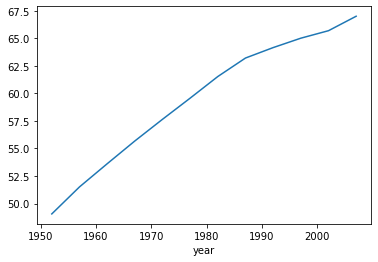

In [20]:
global_life.plot()